# "Generador de Paleta de Colores Inteligente para Blender"

1. Introducción y Resumen del Proyecto
El presente documento detalla el desarrollo de un recurso para Blender: un "Generador de Paleta de Colores Inteligente". Este add-on, implementado completamente en Python, permite a los artistas y diseñadores 3D extraer automáticamente los colores más predominantes de cualquier imagen, utilizando técnicas de inteligencia artificial, específicamente aprendizaje no supervisado. El objetivo principal es agilizar el proceso de diseño y asegurar la coherencia estética en los proyectos 3D, transformando la inspiración visual de una imagen en elementos directamente utilizables en el entorno de Blender.

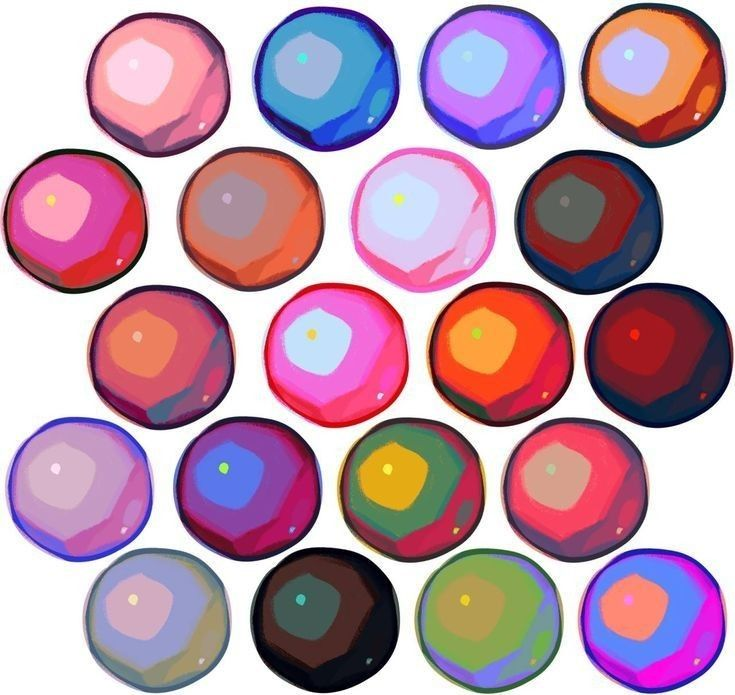

## Objetivos del Proyecto

Los objetivos clave que impulsaron el desarrollo de esta herramienta fueron:

Optimizar el Flujo de Trabajo: Reducir el tiempo y esfuerzo manual requerido para seleccionar y aplicar paletas de colores basadas en referencias visuales externas.
Asegurar la Coherencia Estética: Facilitar la creación de diseños 3D que capturen fielmente la atmósfera y la gama cromática de una imagen de referencia.
Integrar IA en Blender: Demostrar la aplicación práctica de algoritmos de aprendizaje automático directamente dentro de un software de creación 3D mediante scripting en Python.
Generar Recursos Utilizables: Producir materiales y objetos 3D listos para ser empleados en cualquier escena de Blender.

## Creatividad e Iniciativa del Trabajo

Este proyecto destaca por su creatividad e iniciativa al abordar una necesidad común en el diseño 3D con una solución inteligente y automatizada.

La creatividad reside en la conceptualización de un puente directo entre la inspiración visual (una imagen) y la materialización de esa inspiración en el entorno 3D. En lugar de replicar manualmente colores o depender de selectores de color imprecisos, se propuso una solución que "interpreta" la imagen de forma inteligente. La elección de K-Means, un algoritmo de clustering, para esta tarea no solo es ingeniosa sino también altamente efectiva, ya que permite al sistema "descubrir" los colores más representativos sin ninguna intervención humana previa, lo cual es el corazón de la iniciativa de usar IA.

La iniciativa se manifiesta en la completa integración del proceso dentro de Blender. Esto va más allá de un simple script de Python que solo extrae colores; el desarrollo incluye:

Una interfaz de usuario intuitiva (panel en el N-panel) que permite al usuario configurar parámetros clave directamente en Blender.
La generación automática de materiales con los colores extraídos, listos para ser aplicados a cualquier objeto.
La creación opcional de objetos de referencia (esferas), organizados de manera limpia y nombrados de forma personalizada, para una referencia visual instantánea en la escena.
Funcionalidades de optimización (reescalado de imagen para procesamiento) y limpieza de escena (eliminación de paletas anteriores) que reflejan una consideración por la experiencia del usuario final y el mantenimiento de la escena 3D.
La implementación de una tolerancia para la unicidad de colores, asegurando que los colores resultantes sean distintivos y eviten duplicados visualmente idénticos, una mejora impulsada por la iniciativa de refinar la calidad de la paleta.
Estas características en conjunto demuestran una visión proactiva para construir una herramienta robusta y completa que no solo cumple con el requisito técnico, sino que añade un valor significativo al flujo de trabajo del artista.



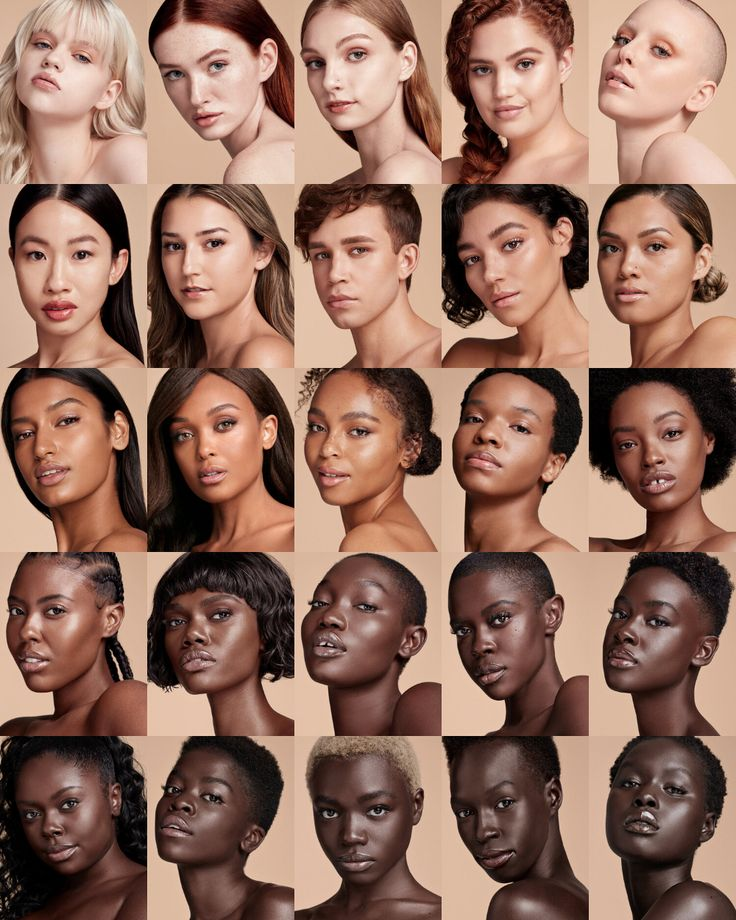

## Metodología y Recursos Empleados

El desarrollo del "Generador de Paleta de Colores Inteligente" se basó en una metodología de scripting modular y la integración de librerías de Python.

## Recursos / Librerías de Python Empleadas

bpy (Blender Python API): La interfaz principal para interactuar con Blender. Permitió la creación de objetos (esferas), materiales, la gestión de propiedades de la escena y la construcción de la interfaz de usuario (paneles y operadores).
numpy: Fundamental para el procesamiento eficiente de los datos de imagen. Los píxeles de la imagen se convierten en arrays de NumPy, facilitando las operaciones numéricas necesarias para el algoritmo de clustering.
PIL (Pillow): Utilizada para la carga y manipulación de imágenes. Proporciona una forma robusta de abrir archivos de imagen de diversos formatos, convertirlos a RGB y redimensionarlos para el procesamiento.
sklearn.cluster.KMeans (scikit-learn): La librería central para la implementación del modelo de Inteligencia Artificial. K-Means es un algoritmo de aprendizaje no supervisado que permite el agrupamiento de datos.

## Implementación del Aprendizaje No Supervisado (K-Means)

El corazón de la funcionalidad del script reside en la aplicación del algoritmo K-Means para la extracción de colores predominantes.

Concepto Sin Etiquetas: A diferencia del aprendizaje supervisado, el K-Means no requiere datos de entrenamiento pre-etiquetados. Su objetivo es identificar patrones y estructuras inherentes en los datos brutos.
Aplicación a Colores: En este contexto, cada píxel de la imagen se trata como un "punto de datos" en un espacio tridimensional RGB (Rojo, Verde, Azul). K-Means agrupa estos millones de puntos en un número predefinido (k) de "clústeres" o grupos.
Centros de Clústeres como Colores Dominantes: Los centroides (o promedios) de estos clústeres representan los colores más característicos y frecuentes de la imagen. Por ejemplo, si una imagen tiene grandes áreas de azul cielo, K-Means identificará un clúster de píxeles azules, y el centro de ese clúster será el color "azul cielo" predominante.
Proceso Iterativo: El algoritmo funciona iterativamente:
Se inicializan k centroides de manera aleatoria.
Cada píxel se asigna al centroide más cercano.
Cada centroide se recalcula como el promedio de todos los píxeles asignados a él.
Estos pasos se repiten hasta que los centroides ya no se muevan significativamente.
Output: El resultado son k colores RGB (representando los centroides), que son los colores dominantes extraídos. Estos valores se normalizan de 0-255 a 0-1 para ser compatibles con el sistema de color de Blender.

## Flujo de Trabajo del Script

Selección de Imagen: El usuario selecciona una imagen externa a través de un explorador de archivos integrado en el panel de Blender.
Configuración de Parámetros: El usuario ajusta las propiedades en el panel personalizado:
Número de Colores: Cantidad de colores (clústeres) a extraer (por defecto: 8).
Escala Proceso: Factor de redimensionamiento de la imagen para acelerar el cálculo de K-Means (útil para imágenes de alta resolución).
Crear Esferas Ref.: Opción para generar esferas 3D con los colores de la paleta.
Prefijo Nombres: Un prefijo personalizable para los nombres de los objetos y materiales generados.
Tolerancia Unicidad Color: Un umbral para fusionar colores K-Means que son extremadamente similares, garantizando que la paleta final solo contenga colores visualmente distintos.
Procesamiento de Imagen: La función extraer_paleta_de_imagen carga la imagen, la redimensiona (si es necesario) y aplica K-Means.
Filtrado de Unicidad: Los colores resultantes de K-Means son post-procesados para eliminar aquellos que están por debajo de la tolerancia de unicidad, asegurando que cada color en la paleta final sea distintivo.
Generación de Recursos en Blender:
Materiales: Se crean nuevos materiales en Blender, cada uno con el color RGB extraído y nombrado con el prefijo personalizado.
Esferas (Opcional): Si se activa la opción, se generan esferas UV en la escena. Cada esfera recibe uno de los materiales generados y se nombra con el prefijo personalizado y un índice. Se organizan en una fila con espaciado uniforme.
Limpieza: Antes de cada nueva generación, la función limpiar_materiales_paleta elimina los materiales y objetos generados por ejecuciones previas para mantener la escena limpia.

## Demostración y Resultados Esperados

Una vez ejecutado el script en Blender, se habilita una nueva pestaña "Paleta" en la barra lateral de la Vista 3D (accesible con la tecla N). Desde este panel, el usuario puede seleccionar una imagen y ajustar las configuraciones. Al hacer clic en "Generar Paleta desde Imagen", el script procesa la imagen y, en cuestión de segundos (dependiendo del tamaño de la imagen y el número de colores), la escena de Blender se poblará con los nuevos materiales en el "Editor de Materiales" y/o una fila de esferas de referencia en la "Vista 3D" y el "Outliner", todas con los colores dominantes de la imagen.

Los resultados son una serie de materiales y objetos 3D que reflejan directamente la paleta cromática de la imagen original, listos para ser utilizados en cualquier proyecto de Blender.

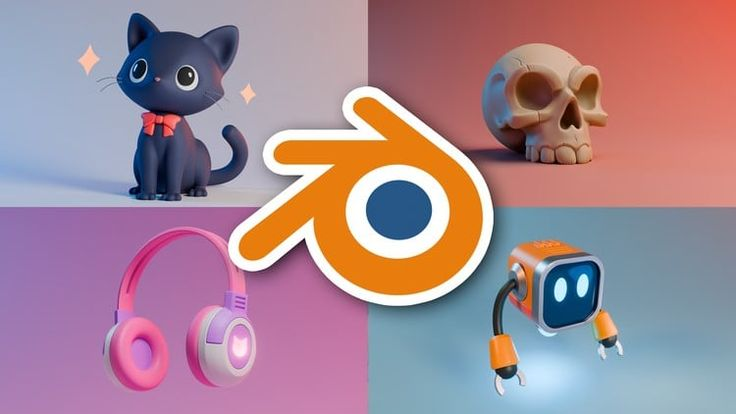